In [1]:
## Purpose: This notebook will be dedicated to the EDA related to the Titanic dataset (training set only)

In [2]:
## import visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## import data
data = pd.read_csv("train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
## First, drop Passenger Id and Ticket - they will not provide any useful info
data = data.drop(['PassengerId', 'Ticket'], axis = 1)

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


## Dealing with Missing Data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


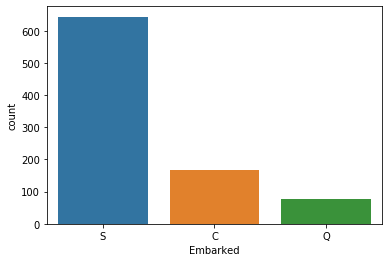

In [8]:
## View breakdown of embarked in order to fill in missing data
sns.countplot(data.Embarked)

In [9]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
## impute missing embarked values with 'S'

data['Embarked'] = data['Embarked'].replace(np.NaN, 'S')
data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
## Dealing with the missing age variable - have decided not to impute as that has proven to be problematic
## Look at the proportion of missing data in order to determine if it can be dropped

## Create dataframe of missing values and dataframe of complete observations
missing = data.loc[data.Age.isnull(), :]
complete = data.loc[data.Age.isnull() == False, :]

In [12]:
missing.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,NaN,Q


In [13]:
complete.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


## Proportions of Missing Data

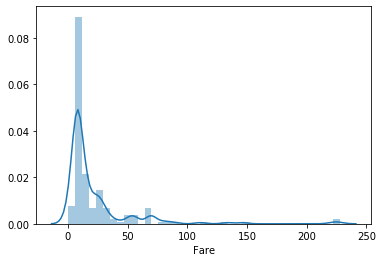

In [14]:
sns.distplot(missing.Fare)

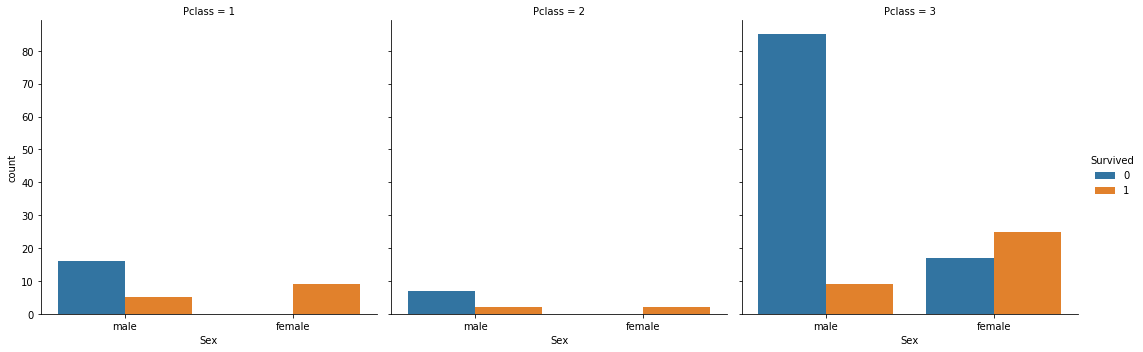

In [15]:
sns.catplot('Sex', hue = 'Survived', col = 'Pclass', kind = 'count', data = missing)

## Proportions of Total Data

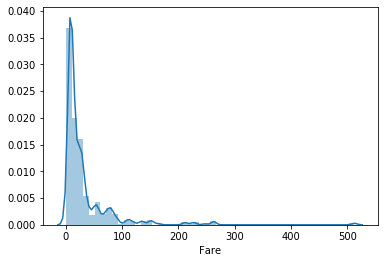

In [16]:
sns.distplot(data.Fare)

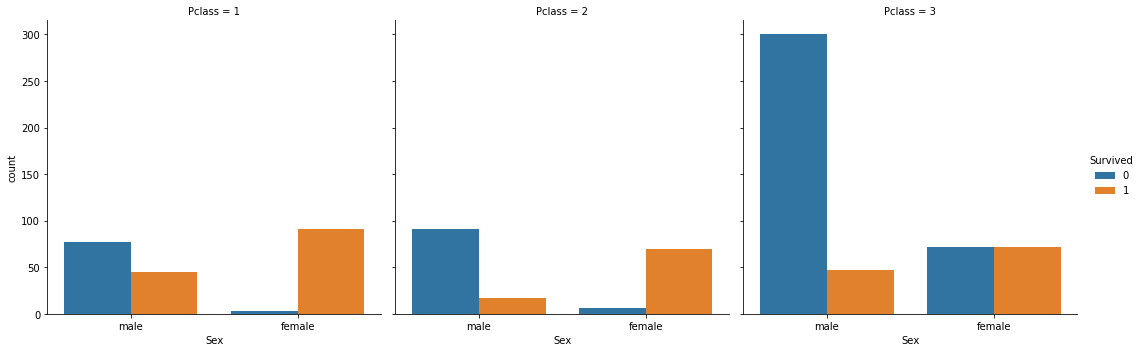

In [17]:
sns.catplot('Sex', hue = 'Survived', col = 'Pclass', kind = 'count', data = data)

## Proportions of Complete Data

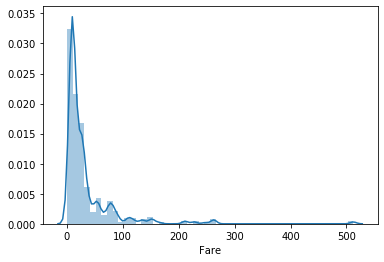

In [18]:
sns.distplot(complete.Fare)

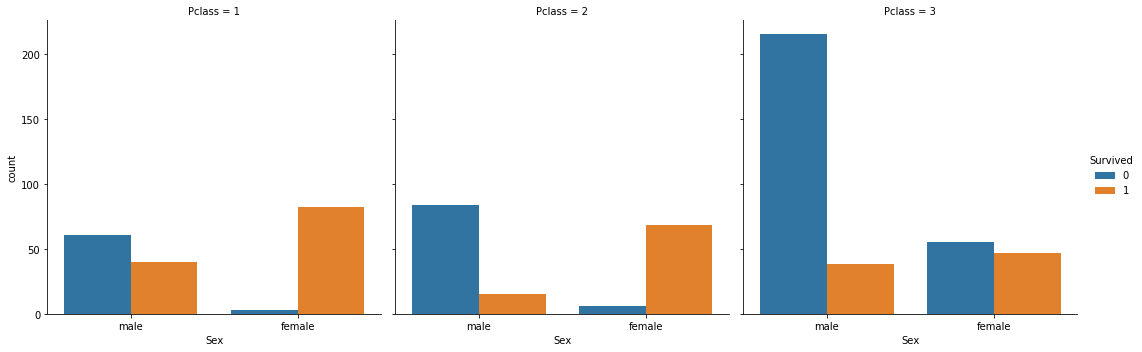

In [19]:
sns.catplot('Sex', hue = 'Survived', col = 'Pclass', kind = 'count', data = complete)

In [20]:
## Conclusion: Removing the missing observations does not seem to affect the proportions/distributions of the main variables
## I feel comfortable removing these observations

In [21]:
## Renaming the datasets. 'Data' is now complete as to its observations and will be used from now on
total = data
data = complete

data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G6,S


## Further Data Cleaning

In [22]:
## Split the name into componenents and keep the prefix. Will look at prefix later on
intermediate = data["Name"].str.split(pat = ".", n = 1, expand = True)
prefix = intermediate[0].str.split(",", expand = True)
prefix.head()

,0,1
0,Braund,Mr
1,Cumings,Mrs
2,Heikkinen,Miss
3,Futrelle,Mrs
4,Allen,Mr


In [23]:
## Add last name and prefix back into dataframe. 
data['Lname'] = prefix[0].str.lstrip()
data['Prefix'] = prefix[1].str.lstrip()
data.head()

A:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
A:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Lname,Prefix
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Braund,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Cumings,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Heikkinen,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Futrelle,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Allen,Mr


In [24]:
## Drop name from Data
data = data.drop('Name', axis = 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Lname,Prefix
0,0,3,male,22.0,1,0,7.2500,NaN,S,Braund,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Cumings,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Heikkinen,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Futrelle,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Allen,Mr


In [25]:
## View unique prefixes 
data.Prefix.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [26]:
## Change Miss to Ms
data.Prefix = data.Prefix.replace('Miss', 'Ms')
data.Prefix.unique()

array(['Mr', 'Mrs', 'Ms', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Major',
       'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer'],
      dtype=object)

In [27]:
data['Cabin_letter'] = data['Cabin'].str.slice(0,1)
data = data.drop('Cabin', axis = 1)

## replace missing cabins with X
data['Cabin_letter'] = data['Cabin_letter'].replace(np.NaN, 'X')
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Lname,Prefix,Cabin_letter
0,0,3,male,22.0,1,0,7.2500,S,Braund,Mr,X
1,1,1,female,38.0,1,0,71.2833,C,Cumings,Mrs,C
2,1,3,female,26.0,0,0,7.9250,S,Heikkinen,Ms,X
3,1,1,female,35.0,1,0,53.1000,S,Futrelle,Mrs,C
4,0,3,male,35.0,0,0,8.0500,S,Allen,Mr,X


## EDA

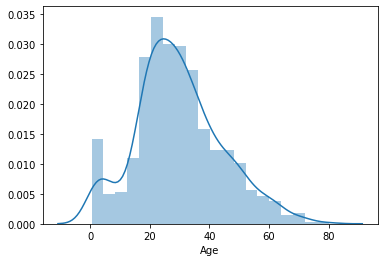

In [28]:
## First look at distributions of fare and age

sns.distplot(data.Age)

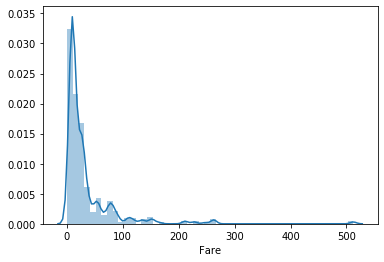

In [29]:
sns.distplot(data.Fare)

In [30]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


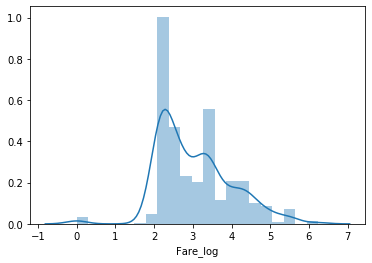

In [31]:
## Fare is very right skewed and will need to be transformed. Take log of Fare + 1 as min of Fare is 0
data['Fare_log'] = np.log(data['Fare']  + 1)
sns.distplot(data['Fare_log'])
## this is a more normal distribution

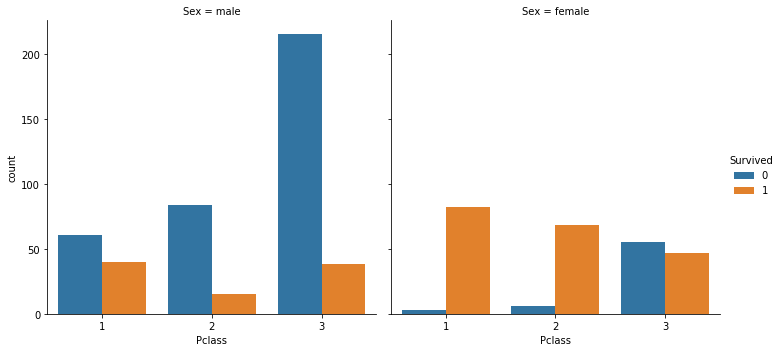

In [32]:
## Look at sex, pclass, and survived

sns.catplot('Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = complete)

In [33]:
## Females in class 1 and 2 clearly look like they have a better chance of survivig

In [34]:
## Create a 'Child' column and see if the passenger was less than 14 years old
data['Child'] = data['Age'].apply(lambda x: 1 if x < 14 else 0)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Lname,Prefix,Cabin_letter,Fare_log,Child
0,0,3,male,22.0,1,0,7.2500,S,Braund,Mr,X,2.110213,0
1,1,1,female,38.0,1,0,71.2833,C,Cumings,Mrs,C,4.280593,0
2,1,3,female,26.0,0,0,7.9250,S,Heikkinen,Ms,X,2.188856,0
3,1,1,female,35.0,1,0,53.1000,S,Futrelle,Mrs,C,3.990834,0
4,0,3,male,35.0,0,0,8.0500,S,Allen,Mr,X,2.202765,0


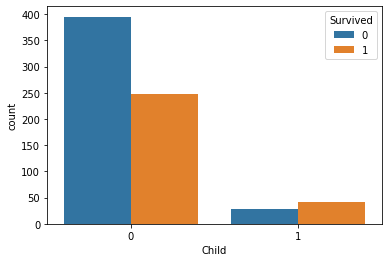

In [35]:
## View countplot of child 
sns.countplot('Child', hue = 'Survived', data = data)

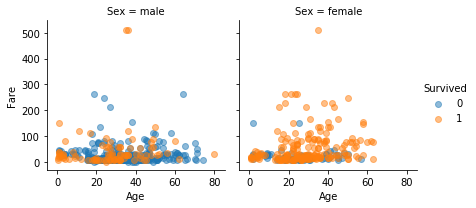

In [37]:
## Create plots for the relationship between age and fair and view by sex 
ax = sns.FacetGrid(data, col = 'Sex', hue = 'Survived')
ax.map(plt.scatter, 'Age', 'Fare', alpha = .5)
ax.add_legend()

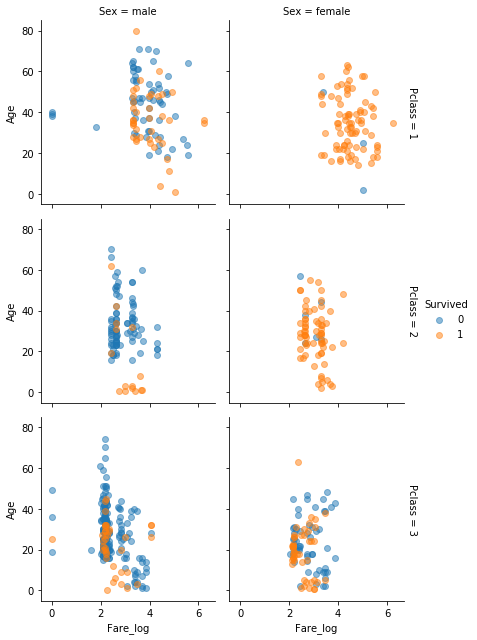

In [38]:
## Plot Age and log of fair separated by Pclass and sex
## none of these seem to have a liear relationship
ax = sns.FacetGrid(data, row = 'Pclass', col = 'Sex', hue = 'Survived', margin_titles = True)
ax.map(plt.scatter, 'Fare_log', 'Age', alpha = .5)
ax.add_legend()
## Create categories for each of these as there is clear separation

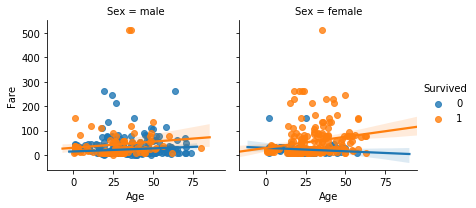

In [39]:
ax = sns.FacetGrid(data, col = 'Sex', hue = 'Survived')
ax.map(sns.regplot, 'Age', 'Fare')
ax.add_legend()

In [40]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Lname,Prefix,Cabin_letter,Fare_log,Child
0,0,3,male,22.0,1,0,7.2500,S,Braund,Mr,X,2.110213,0
1,1,1,female,38.0,1,0,71.2833,C,Cumings,Mrs,C,4.280593,0
2,1,3,female,26.0,0,0,7.9250,S,Heikkinen,Ms,X,2.188856,0
3,1,1,female,35.0,1,0,53.1000,S,Futrelle,Mrs,C,3.990834,0
4,0,3,male,35.0,0,0,8.0500,S,Allen,Mr,X,2.202765,0


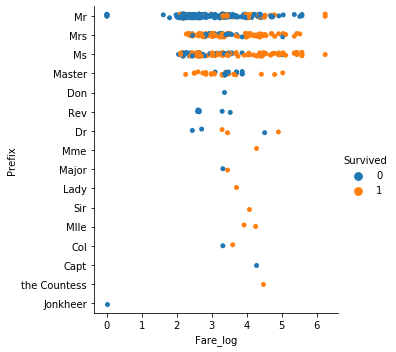

In [41]:
sns.catplot(x = 'Fare_log', y = 'Prefix', hue = 'Survived', data = data)

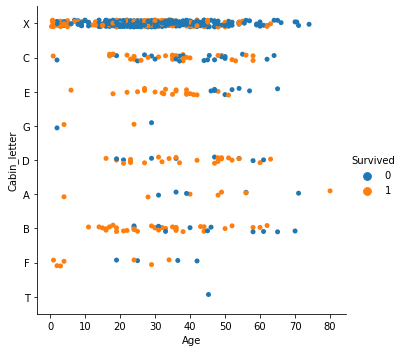

In [42]:
sns.catplot(x = 'Age', y = 'Cabin_letter', hue = 'Survived', data = data)

In [43]:
## There are simply too many unknown cabins to justify using this - the cabins that are known are likely known because
## the occupant survived

In [44]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Lname,Prefix,Cabin_letter,Fare_log,Child
0,0,3,male,22.0,1,0,7.2500,S,Braund,Mr,X,2.110213,0
1,1,1,female,38.0,1,0,71.2833,C,Cumings,Mrs,C,4.280593,0
2,1,3,female,26.0,0,0,7.9250,S,Heikkinen,Ms,X,2.188856,0
3,1,1,female,35.0,1,0,53.1000,S,Futrelle,Mrs,C,3.990834,0
4,0,3,male,35.0,0,0,8.0500,S,Allen,Mr,X,2.202765,0


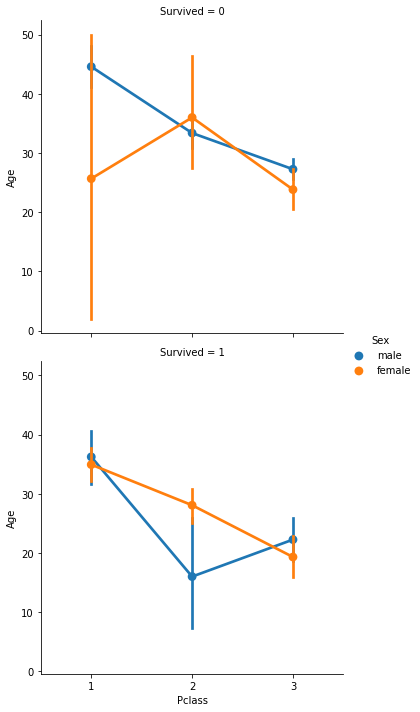

In [45]:
sns.catplot(x = 'Pclass', y = 'Age', hue = 'Sex', kind = 'point', row = 'Survived', data = data)

In [46]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Lname,Prefix,Cabin_letter,Fare_log,Child
0,0,3,male,22.0,1,0,7.2500,S,Braund,Mr,X,2.110213,0
1,1,1,female,38.0,1,0,71.2833,C,Cumings,Mrs,C,4.280593,0
2,1,3,female,26.0,0,0,7.9250,S,Heikkinen,Ms,X,2.188856,0
3,1,1,female,35.0,1,0,53.1000,S,Futrelle,Mrs,C,3.990834,0
4,0,3,male,35.0,0,0,8.0500,S,Allen,Mr,X,2.202765,0


In [47]:
## Let's create two more features - family size and product of sex*pclass(as we have seen women in class 1 and 2 appeared more likely to survive)
## Additionally, let's simplify all the prefixes

data.Prefix.unique()

array(['Mr', 'Mrs', 'Ms', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Major',
       'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer'],
      dtype=object)

In [48]:
## Create 'honor' prefix for major, lady, sir, col, capt, countess, jonkheer, don, rev, dr 
## change master to mr, mme to mrs, and mlle to ms

data.Prefix = data.Prefix.replace(["Lady", "Sir", "Major", "Col", "Capt", "the Countess", "Jonkheer", "Don", "Rev", "Dr"], "Honor")
data.Prefix = data.Prefix.replace("Master", "Mr")
data.Prefix = data.Prefix.replace("Mme", "Mrs")
data.Prefix = data.Prefix.replace("Mlle", "Ms")
data.Prefix.unique()

array(['Mr', 'Mrs', 'Ms', 'Honor'], dtype=object)

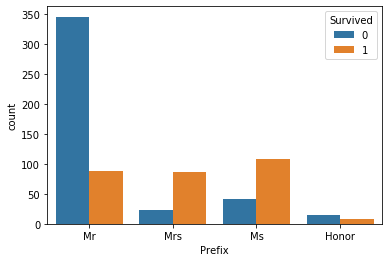

In [49]:
sns.countplot('Prefix', hue = 'Survived', data = data)

In [50]:
## Prefix does not seem to add much useful information - it is already known that women survive at a higher rate

In [51]:
## Create family size
data['Family_size'] = data['SibSp'] + data['Parch']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Lname,Prefix,Cabin_letter,Fare_log,Child,Family_size
0,0,3,male,22.0,1,0,7.2500,S,Braund,Mr,X,2.110213,0,1
1,1,1,female,38.0,1,0,71.2833,C,Cumings,Mrs,C,4.280593,0,1
2,1,3,female,26.0,0,0,7.9250,S,Heikkinen,Ms,X,2.188856,0,0
3,1,1,female,35.0,1,0,53.1000,S,Futrelle,Mrs,C,3.990834,0,1
4,0,3,male,35.0,0,0,8.0500,S,Allen,Mr,X,2.202765,0,0


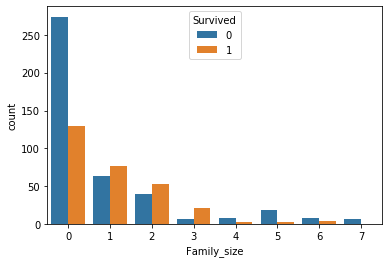

In [52]:
sns.countplot('Family_size', hue = 'Survived', data = data)

## This might be interesting to see with col = sex, row = pclass 
## Maybe just make a parent? and child? binary column

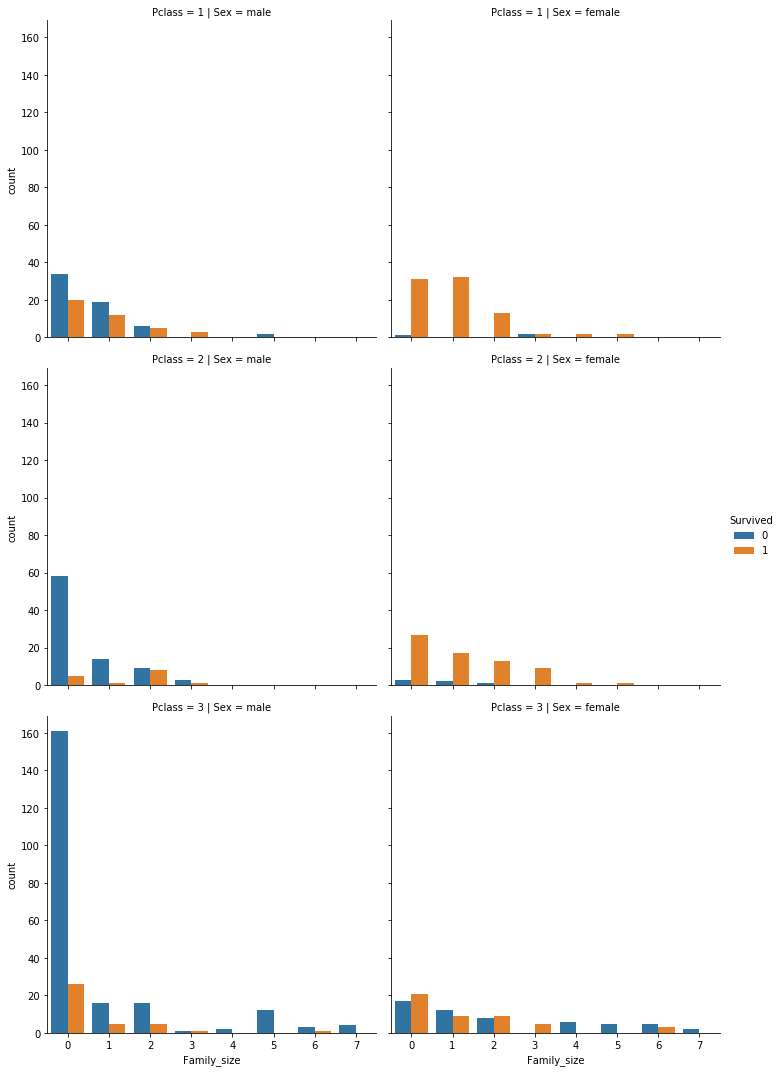

In [53]:
sns.catplot('Family_size', hue = 'Survived', col = 'Sex', row = 'Pclass', kind = 'count', data = data)

In [54]:
data['Parent/Child?'] = data['Parch'].apply(lambda x: 1 if x > 0 else 0)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Lname,Prefix,Cabin_letter,Fare_log,Child,Family_size,Parent/Child?
0,0,3,male,22.0,1,0,7.2500,S,Braund,Mr,X,2.110213,0,1,0
1,1,1,female,38.0,1,0,71.2833,C,Cumings,Mrs,C,4.280593,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,Heikkinen,Ms,X,2.188856,0,0,0
3,1,1,female,35.0,1,0,53.1000,S,Futrelle,Mrs,C,3.990834,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,Allen,Mr,X,2.202765,0,0,0


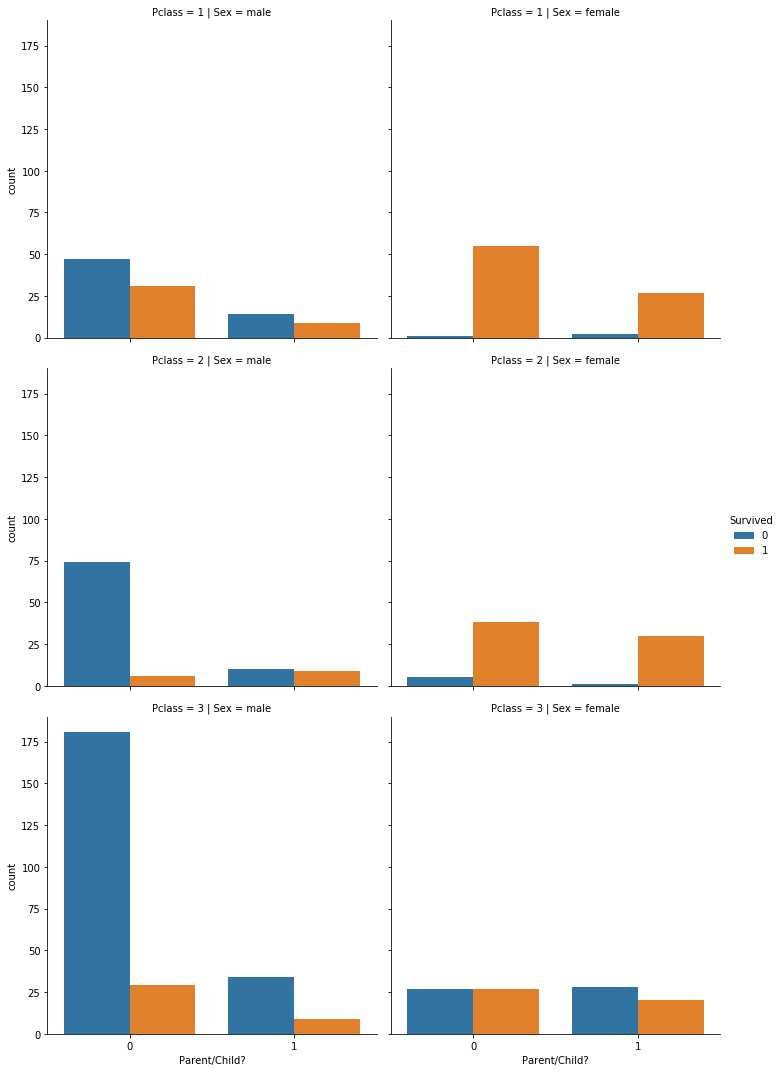

In [55]:
sns.catplot('Parent/Child?', row = 'Pclass', col = 'Sex',  hue = 'Survived', kind = 'count', data = data)

In [56]:
## Again we see that the most important feature seems to sex and pclass 

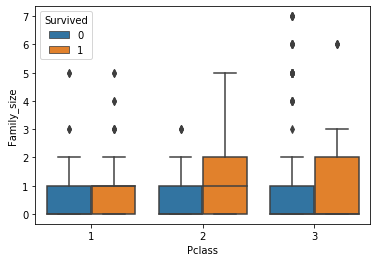

In [57]:
sns.boxplot(x = 'Pclass', y = 'Family_size', hue = 'Survived', data = data)

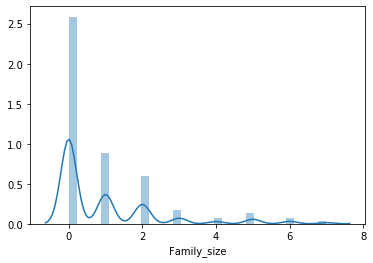

In [58]:
sns.distplot(data['Family_size'], hist = True)

In [59]:
## Take the log of family_size
data['Family_log'] = np.log(data['Family_size'] + 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Lname,Prefix,Cabin_letter,Fare_log,Child,Family_size,Parent/Child?,Family_log
0,0,3,male,22.0,1,0,7.2500,S,Braund,Mr,X,2.110213,0,1,0,0.693147
1,1,1,female,38.0,1,0,71.2833,C,Cumings,Mrs,C,4.280593,0,1,0,0.693147
2,1,3,female,26.0,0,0,7.9250,S,Heikkinen,Ms,X,2.188856,0,0,0,0.000000
3,1,1,female,35.0,1,0,53.1000,S,Futrelle,Mrs,C,3.990834,0,1,0,0.693147
4,0,3,male,35.0,0,0,8.0500,S,Allen,Mr,X,2.202765,0,0,0,0.000000


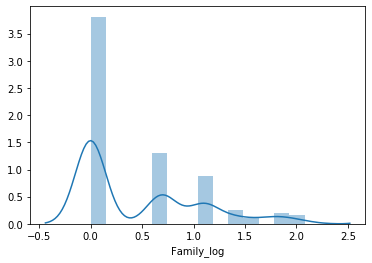

In [60]:
sns.distplot(data['Family_log'])

In [61]:
## log did not help, maybe take exp during preprocessing

In [62]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Lname,Prefix,Cabin_letter,Fare_log,Child,Family_size,Parent/Child?,Family_log
0,0,3,male,22.0,1,0,7.2500,S,Braund,Mr,X,2.110213,0,1,0,0.693147
1,1,1,female,38.0,1,0,71.2833,C,Cumings,Mrs,C,4.280593,0,1,0,0.693147
2,1,3,female,26.0,0,0,7.9250,S,Heikkinen,Ms,X,2.188856,0,0,0,0.000000
3,1,1,female,35.0,1,0,53.1000,S,Futrelle,Mrs,C,3.990834,0,1,0,0.693147
4,0,3,male,35.0,0,0,8.0500,S,Allen,Mr,X,2.202765,0,0,0,0.000000


In [63]:
## Final feature - sex*pclass (have to turn sex into dummy)
data = pd.get_dummies(data, columns = ['Sex'],  drop_first = True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Lname,Prefix,Cabin_letter,Fare_log,Child,Family_size,Parent/Child?,Family_log,Sex_male
0,0,3,22.0,1,0,7.2500,S,Braund,Mr,X,2.110213,0,1,0,0.693147,1
1,1,1,38.0,1,0,71.2833,C,Cumings,Mrs,C,4.280593,0,1,0,0.693147,0
2,1,3,26.0,0,0,7.9250,S,Heikkinen,Ms,X,2.188856,0,0,0,0.000000,0
3,1,1,35.0,1,0,53.1000,S,Futrelle,Mrs,C,3.990834,0,1,0,0.693147,0
4,0,3,35.0,0,0,8.0500,S,Allen,Mr,X,2.202765,0,0,0,0.000000,1


In [64]:
## The reason for the data transformation below is to create a unique product for each pclass*sex combination

data['Sex_pclass'] = (data['Sex_male'] + .5) * (data['Pclass'] + .5) 
data['Sex_pclass'] = data['Sex_pclass'].replace(.75, "A")
data['Sex_pclass'] = data['Sex_pclass'].replace(1.25, "B")
data['Sex_pclass'] = data['Sex_pclass'].replace(1.75, "C")
data['Sex_pclass'] = data['Sex_pclass'].replace(2.25, "D")
data['Sex_pclass'] = data['Sex_pclass'].replace(3.75, "E")
data['Sex_pclass'] = data['Sex_pclass'].replace(5.25, "F")
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Lname,Prefix,Cabin_letter,Fare_log,Child,Family_size,Parent/Child?,Family_log,Sex_male,Sex_pclass
0,0,3,22.0,1,0,7.2500,S,Braund,Mr,X,2.110213,0,1,0,0.693147,1,F
1,1,1,38.0,1,0,71.2833,C,Cumings,Mrs,C,4.280593,0,1,0,0.693147,0,A
2,1,3,26.0,0,0,7.9250,S,Heikkinen,Ms,X,2.188856,0,0,0,0.000000,0,C
3,1,1,35.0,1,0,53.1000,S,Futrelle,Mrs,C,3.990834,0,1,0,0.693147,0,A
4,0,3,35.0,0,0,8.0500,S,Allen,Mr,X,2.202765,0,0,0,0.000000,1,F


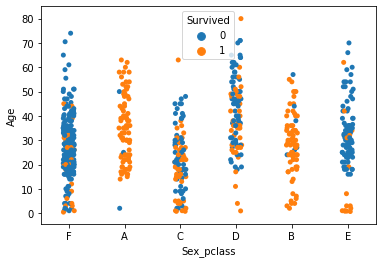

In [65]:
sns.stripplot(x = 'Sex_pclass', y = 'Age', hue = 'Survived', jitter = True, data = data)

## Data Transformation

In [66]:
## Performing the data transformation here for both trees (rf and gradient boosted) as well as linear models (log and svc)
## This will keep the model notebook cleaner

In [67]:
## Tree transformation
## From my understanding, trees do not require nearly as much data transformation as linear models
## Transformation will include dropping unnecessary columns and creating dummies
## Unnecessary models include logs, child, cabin_letter, lname, SibSp, Parch
## The rets we will be getting dummies for
train_tree = data.drop(["Fare_log", "Child", "Family_log", "Lname", "Cabin_letter", "SibSp", "Parch"], axis = 1)


In [68]:
train_tree.head()

,Survived,Pclass,Age,Fare,Embarked,Prefix,Family_size,Parent/Child?,Sex_male,Sex_pclass
0,0,3,22.0,7.2500,S,Mr,1,0,1,F
1,1,1,38.0,71.2833,C,Mrs,1,0,0,A
2,1,3,26.0,7.9250,S,Ms,0,0,0,C
3,1,1,35.0,53.1000,S,Mrs,1,0,0,A
4,0,3,35.0,8.0500,S,Mr,0,0,1,F


In [69]:
## Now get dummies for remaining features
train_tree = pd.get_dummies(train_tree, drop_first = True)
train_tree.head()

,Survived,Pclass,Age,Fare,Family_size,Parent/Child?,Sex_male,Embarked_Q,Embarked_S,Prefix_Mr,Prefix_Mrs,Prefix_Ms,Sex_pclass_B,Sex_pclass_C,Sex_pclass_D,Sex_pclass_E,Sex_pclass_F
0,0,3,22.0,7.2500,1,0,1,0,1,1,0,0,0,0,0,0,1
1,1,1,38.0,71.2833,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,7.9250,0,0,0,0,1,0,0,1,0,1,0,0,0
3,1,1,35.0,53.1000,1,0,0,0,1,0,1,0,0,0,0,0,0
4,0,3,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1


In [70]:
## Train tree is ready to be used 

In [71]:
## Data Transformation for tree models
## Need to drop unncessary columns
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Lname,Prefix,Cabin_letter,Fare_log,Child,Family_size,Parent/Child?,Family_log,Sex_male,Sex_pclass
0,0,3,22.0,1,0,7.2500,S,Braund,Mr,X,2.110213,0,1,0,0.693147,1,F
1,1,1,38.0,1,0,71.2833,C,Cumings,Mrs,C,4.280593,0,1,0,0.693147,0,A
2,1,3,26.0,0,0,7.9250,S,Heikkinen,Ms,X,2.188856,0,0,0,0.000000,0,C
3,1,1,35.0,1,0,53.1000,S,Futrelle,Mrs,C,3.990834,0,1,0,0.693147,0,A
4,0,3,35.0,0,0,8.0500,S,Allen,Mr,X,2.202765,0,0,0,0.000000,1,F


In [72]:
## Strip this to only a few features and then perform binning, minmaxscaler, and 
train_linear = data.drop(["SibSp", "Parch", "Embarked", "Lname", "Cabin_letter", "Fare_log", "Child", "Parent/Child?", "Family_log"], axis = 1)
train_linear.head()

,Survived,Pclass,Age,Fare,Prefix,Family_size,Sex_male,Sex_pclass
0,0,3,22.0,7.2500,Mr,1,1,F
1,1,1,38.0,71.2833,Mrs,1,0,A
2,1,3,26.0,7.9250,Ms,0,0,C
3,1,1,35.0,53.1000,Mrs,1,0,A
4,0,3,35.0,8.0500,Mr,0,1,F


In [73]:
## before doing min_max scaler and other transforms -  pclass needs to be made into a dummy this is categorical data 
## save the svc regression before doing any logs

train_linear = pd.get_dummies(train_linear, columns = ["Pclass", "Prefix", "Sex_pclass"], drop_first = True)
train_linear.head()

,Survived,Age,Fare,Family_size,Sex_male,Pclass_2,Pclass_3,Prefix_Mr,Prefix_Mrs,Prefix_Ms,Sex_pclass_B,Sex_pclass_C,Sex_pclass_D,Sex_pclass_E,Sex_pclass_F
0,0,22.0,7.2500,1,1,0,1,1,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0
2,1,26.0,7.9250,0,0,0,1,0,0,1,0,1,0,0,0
3,1,35.0,53.1000,1,0,0,0,0,1,0,0,0,0,0,0
4,0,35.0,8.0500,0,1,0,1,1,0,0,0,0,0,0,1


In [74]:
## Actually might need to do this after splitting the data into train and test 

In [75]:
## Save datasets to import into model notebook

train_tree.to_csv("train_tree.csv", index = False)
train_linear.to_csv("train_linear.csv", index = False)

## Final Test set cleaning and transformations

In [ ]:
## See Notebook 2
